In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Sobel Filter from Q1
def sobel(gray):
    ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    #binary=gray
    
    sobelx = cv2.Sobel(binary,-1,1,0,ksize=5)
    sobely = cv2.Sobel(binary,-1,0,1,ksize=5)
    sobelxy = cv2.Sobel(binary,-1,1,1,ksize=5)    
    #print("BINARY")
    #plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))
    #plt.show()
    #print("SOBEL-X")
    #plt.imshow(sobelx,cmap="gray")
    #plt.show()
    #print("SOBEL-Y")
    #plt.imshow(sobely,cmap="gray")
    #plt.show()
    #print("SOBEL-XY")
    #plt.imshow(sobelxy,cmap="gray")
    #plt.show()

   
    return sobelx,sobely,sobelxy

In [15]:
img = cv2.imread("c3.png")
img = cv2.resize(img, (0,0), fx=2, fy=2) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx,sobely,sobelxy=sobel(gray)

In [16]:
res=cv2.bitwise_and(sobelx,sobely)
#plt.imshow(res,cmap="gray")

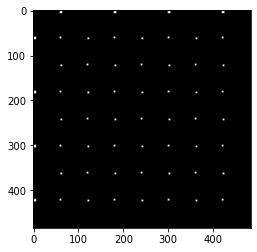

In [17]:
kernel = np.ones((3,3), np.uint8)
img_dilation = cv2.dilate(res, kernel, iterations=1)
plt.imshow(img_dilation,cmap='gray')

In [18]:
found=[]
img_org=img

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 0.4
fontColor              = (0,0,255)
lineType               = 1

for i in range(img_dilation.shape[0]):
    for j in range(img_dilation.shape[1]):
        if(img_dilation[i][j]>0):
            img_org[i][j][0]=255
            img_org[i][j][1]=0
            img_org[i][j][2]=0
            xval=int((i+20)/(img.shape[0]/8))
            yval=int((j+20)/(img.shape[1]/8))
            
            if([xval,yval] not in found):
                found.append([xval,yval])
                cv2.putText(img_org,f'({xval},{yval})',(i,j),font,fontScale,fontColor,lineType)
 #               cc+=1
#print(cc)
                
            
cv2.imshow('window',img_org)
cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.imwrite('output_userdefined1.jpg',img_org)
            
# plt.imshow(img_org)
# plt.show()

True

In [19]:
## canny and sobel

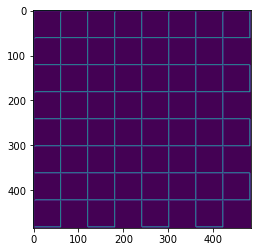

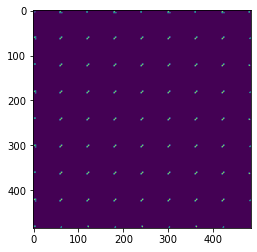

In [20]:
img = cv2.imread("c3.png")
img = cv2.resize(img, (0,0), fx=2, fy=2) 
img_org2=img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
img_edge = cv2.Canny(binary,100,200)
plt.imshow(img_edge)
plt.show()
temp1,temp2,points=sobel(img_edge)
plt.imshow(points)
plt.show()

In [21]:
found=[]

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 0.4
fontColor              = (0,0,255)
lineType               = 1

for i in range(points.shape[0]):
    for j in range(points.shape[1]):
        if(points[i][j]>0):
            img_org2[i][j][0]=255
            img_org2[i][j][1]=0
            img_org2[i][j][2]=0
            xval=int((i+20)/(img.shape[0]/8))
            yval=int((j+20)/(img.shape[1]/8))
            
            if([xval,yval] not in found):
                found.append([xval,yval])
                cv2.putText(img_org2,f'({xval},{yval})',(i,j),font,fontScale,fontColor,lineType)
                #cc+=1
#print(cc)
                
            
cv2.imshow('window',img_org2)
cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.imwrite('output_userdefined2.jpg',img_org2)
            
# plt.imshow(img_org)
# plt.show()

True

In [22]:
## Inbuit 

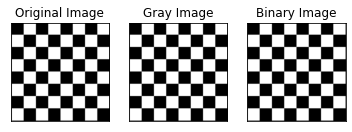

In [23]:
img = cv2.imread("c3.png")
img = cv2.resize(img, (0,0), fx=2, fy=2) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gray, cmap='gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(gray, cmap='gray')
plt.title('Binary Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
corners = cv2.goodFeaturesToTrack(binary, 81, 0.01, 10) #img,points,quality,distance b/w corner

#shi thomasi method
# convert corners values to integer
# So that we will be able to draw circles on them
corners = np.int0(corners)

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = .4
fontColor              = (0,0,255)
lineType               = 1

# draw red color circles on all corners
ii=0
for i in corners:
    x, y = i.ravel()
    #print(x,y)
    cv2.circle(img, (x, y), 3, (255, 0, 0), -1)
    cv2.putText(img,f'({int((x+20)/(img.shape[0]/8))},{int((y+20)/(img.shape[1]/8))})',(x,y),font,fontScale,fontColor,lineType)
    ii+=1
print(ii)
  
# resulting image
# plt.imshow(img)
# plt.show()  
cv2.imshow('window',img)
cv2.waitKey(0) 
cv2.destroyAllWindows()
cv2.imwrite('output_inbuit.jpg',img)

80


True